✅ Training samples: (50000, 32, 32, 3)
✅ Test samples: (10000, 32, 32, 3)


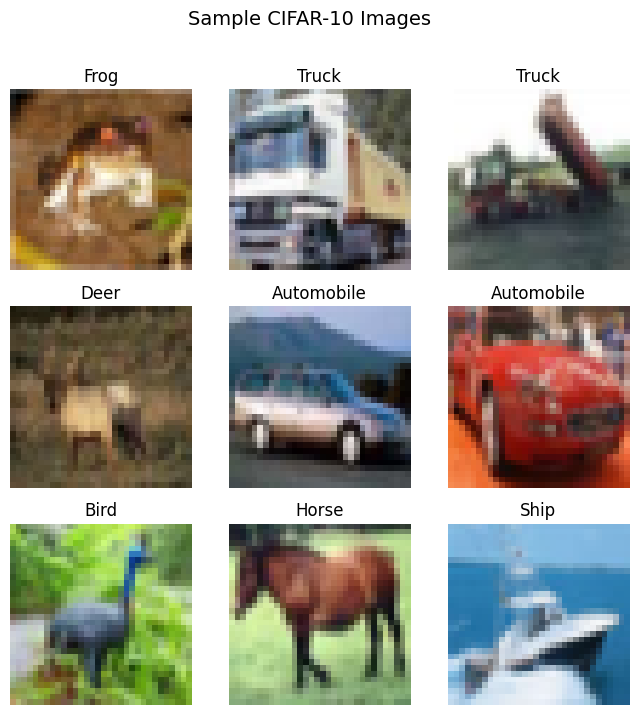

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 51ms/step - accuracy: 0.3261 - loss: 1.8179 - val_accuracy: 0.5182 - val_loss: 1.3348
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5442 - loss: 1.2778 - val_accuracy: 0.5854 - val_loss: 1.1335
313/313 - 3s - 8ms/step - accuracy: 0.5854 - loss: 1.1335

✅ Test Accuracy: 58.54%


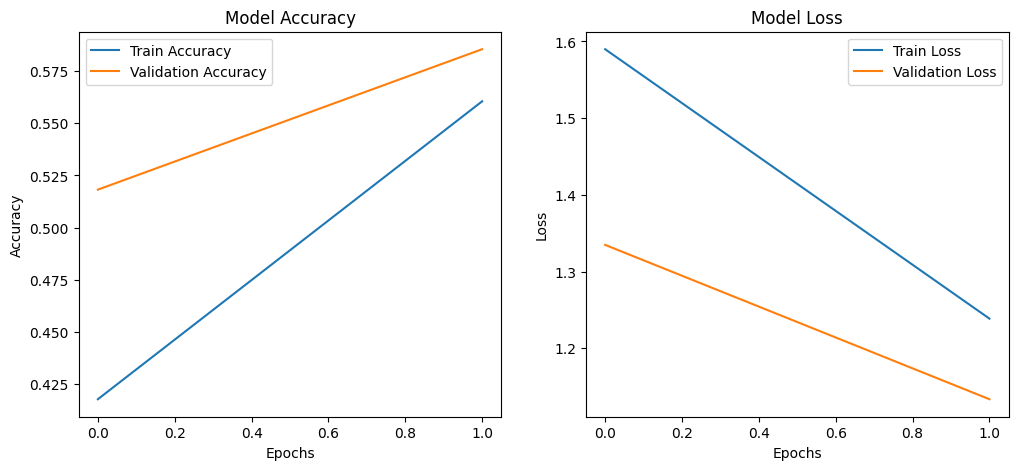

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


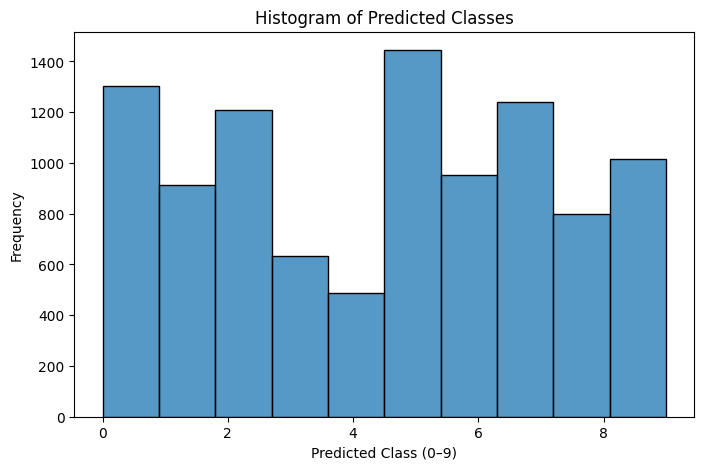

⚠️ Misclassified samples: 4146


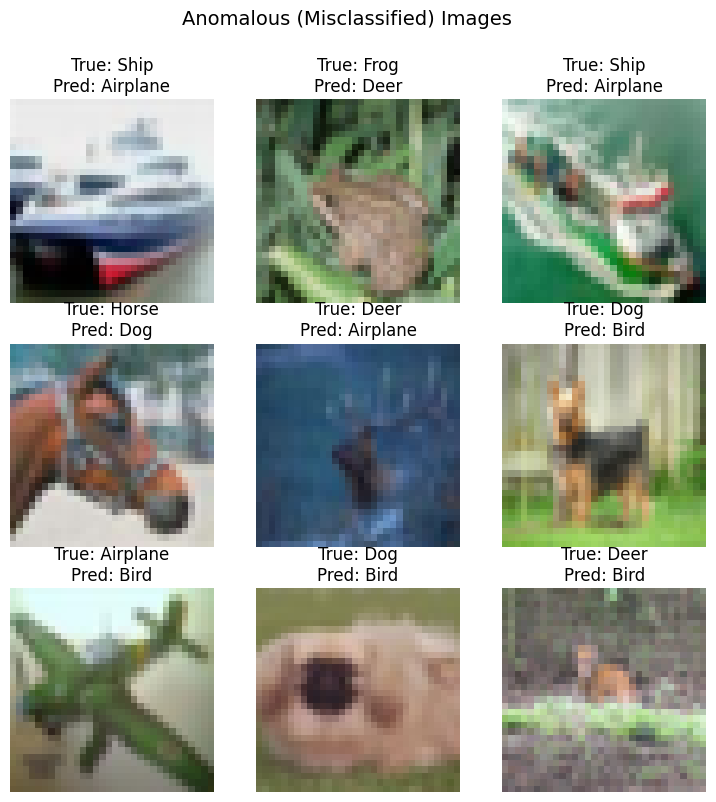

In [ ]:
# ============================================================
# 🎯 AIM: Build Image Classification Model (CIFAR-10)
# ============================================================

# ---------------------------
# a. Loading & Preprocessing
# ---------------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize pixel values (0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Class names for CIFAR-10
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

print("✅ Training samples:", X_train.shape)
print("✅ Test samples:", X_test.shape)

# Show sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images", fontsize=14)
plt.show()


# ---------------------------
# b. Define Model Architecture
# ---------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

model.summary()


# ---------------------------
# c. Train the Model
# ---------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_test, y_test),
                    batch_size=64, verbose=1)


# ---------------------------
# d. Evaluate & Analyze Performance
# ---------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Plot accuracy & loss curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title("Model Accuracy"); plt.xlabel("Epochs"); plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title("Model Loss"); plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.show()


# ---------------------------
# 📊 Histogram of Predictions
# ---------------------------
y_pred = np.argmax(model.predict(X_test), axis=1)

print("Predicted Class:", class_names[y_pred[0]])
print("True Class:", class_names[y_test[0]])


plt.figure(figsize=(8,5))
sns.histplot(y_pred, bins=10, kde=False)
plt.title("Histogram of Predicted Classes")
plt.xlabel("Predicted Class (0–9)")
plt.ylabel("Frequency")
plt.show()


# ---------------------------
# 🚨 Anomaly Detection (Misclassified Images)
# ---------------------------
misclassified_idx = np.where(y_pred != y_test)[0]
print(f"⚠️ Misclassified samples: {len(misclassified_idx)}")

# Display 9 misclassified images
plt.figure(figsize=(9,9))
for i, idx in enumerate(misclassified_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.suptitle("Anomalous (Misclassified) Images", fontsize=14)
plt.show()
